Qiskit Visualizations

In [53]:
import numpy as np
from qiskit import *
%matplotlib inline

from matplotlib import style
style.use("dark_background")

In [8]:
#Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)

In [9]:
# H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

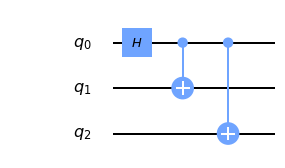

In [10]:
circ.draw('mpl')

In [11]:
# Import Aer
from qiskit import Aer

# Running the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

In [12]:
# Creating a Quantum Program for execution
job = execute(circ, backend)

In [13]:
result = job.result()

In [14]:
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.707+0.j]


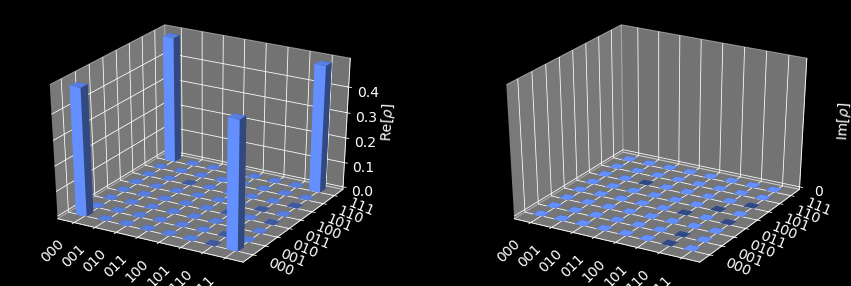

In [15]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

In [16]:
# Running the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()

# Showing the results
print(result.get_unitary(circ, decimals=3))

[[ 0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j -0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]]


In [17]:
# Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# mapping the quantum measurement to the classical bits
meas.measure(range(3),range(3))

# The Qiskit circuit object supports composition using
# the addition operator.
qc = circ+meas

#drawing the circuit
qc.draw()

┌───┐           ░ ┌─┐      
q_0: |0>┤ H ├──■────■───░─┤M├──────
        └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: |0>─────┤ X ├──┼───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: |0>──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
 c_0: 0 ═══════════════════╩══╬══╬═
                              ║  ║ 
 c_1: 0 ══════════════════════╩══╬═
                                 ║ 
 c_2: 0 ═════════════════════════╩═

In [18]:
# Using Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Executing the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=10024)

# Grab the results from the job.
result_sim = job_sim.result()

{'111': 4978, '000': 5046}


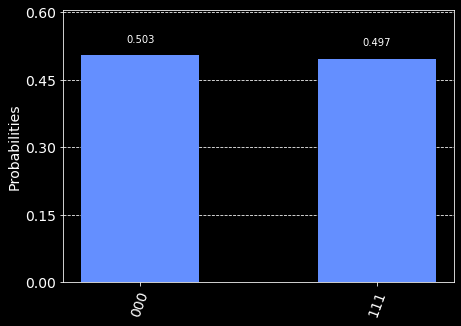

In [19]:
counts = result_sim.get_counts(qc)
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [20]:
# quantum circuit to make a Bell state
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])

# execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = bell+meas
result = execute(circ, backend, shots=1024).result()
counts  = result.get_counts(circ)
print(counts)

{'11': 489, '00': 535}


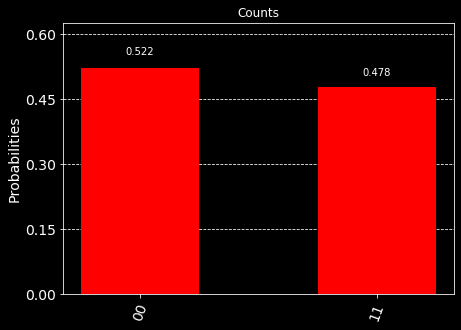

In [43]:
plot_histogram(counts, title="Counts", color=['red'])

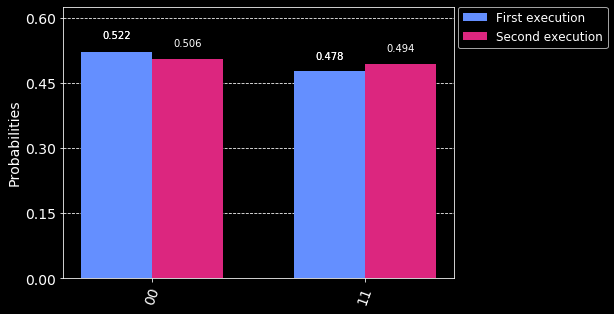

In [22]:
# Execute 2-qubit Bell state again
second_result = execute(circ, backend, shots=1024).result()
second_counts  = second_result.get_counts(circ)
# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend)

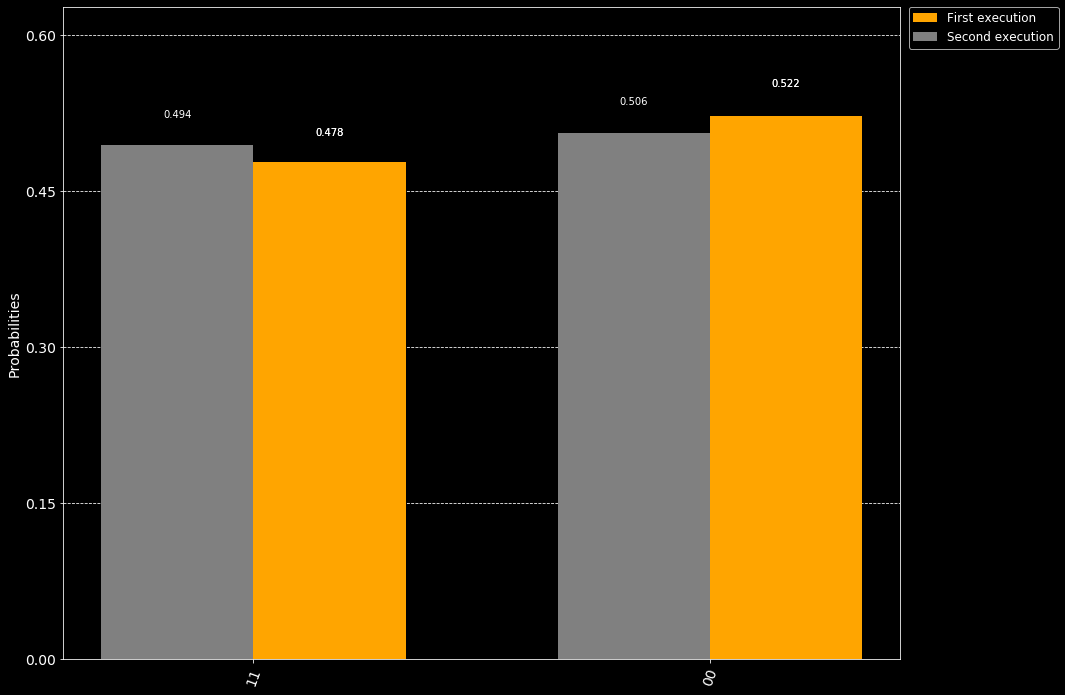

In [23]:
plot_histogram([counts, second_counts], legend=legend, sort='desc', figsize=(15,12),
               color=['orange', 'grey'], bar_labels=True) # call .savefig('out.png') to save the figure to out.png

Plot State -  Visualizing the quantum state

In [24]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

In [60]:
# execute the quantum circuit
# This line is optional: backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(bell, backend).result()
psi  = result.get_statevector(bell)

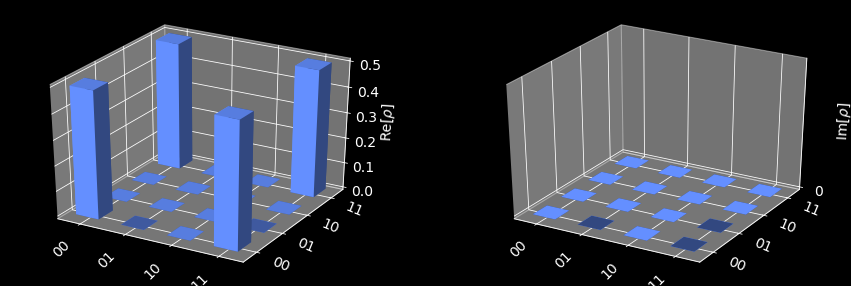

In [61]:
# The standard view for quantum states where the real and imaginary (imag) parts of the state matrix are plotted like a city.
plot_state_city(psi) 

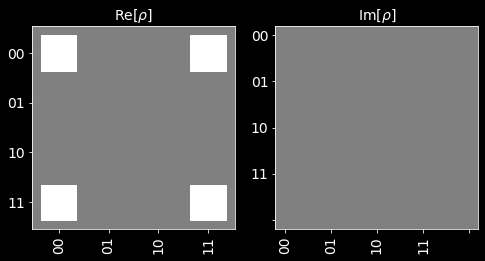

In [62]:
# Same as 'city' but where the size of the element represents the value of the matrix element.
plot_state_hinton(psi)

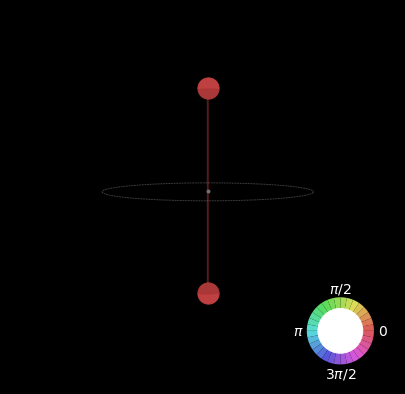

In [63]:
# The Qiskit unique view of a quantum state where the amplitude and phase of the state vector are plotted in a spherical ball. 
# The amplitude is the thickness of the arrow and the phase is the color. 
# For mixed states it will show different 'qsphere' for each component.
plot_state_qsphere(psi)

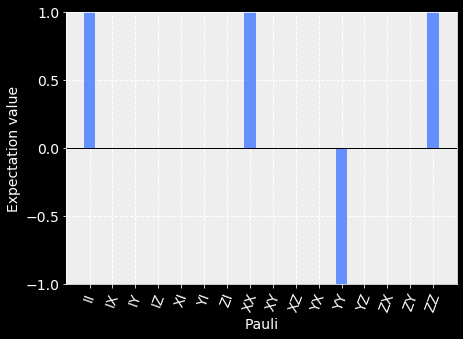

In [64]:
# The representation of the state matrix using Pauli operators as the basis.
plot_state_paulivec(psi)

Here we see that there is no information about the quantum state in the single qubit space as all vectors are zero.

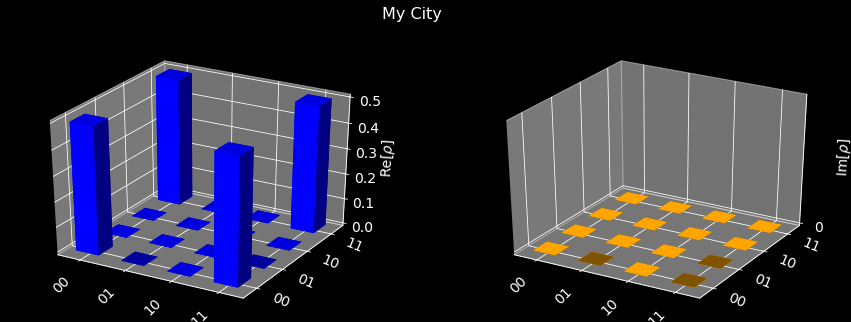

In [39]:
plot_state_city(psi, title="My City", color=['blue', 'orange'])

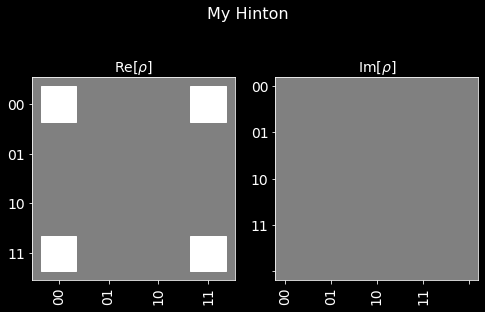

In [44]:
plot_state_hinton(psi, title="My Hinton")

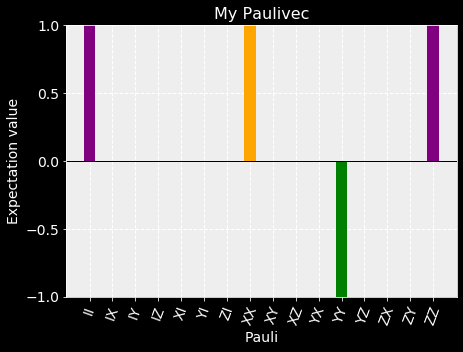

In [45]:
plot_state_paulivec(psi, title="My Paulivec", color=['purple', 'orange', 'green'])

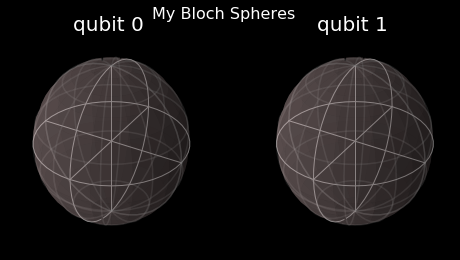

In [46]:
plot_bloch_multivector(psi, title="My Bloch Spheres")

In [47]:
from qiskit.tools.visualization import iplot_state_paulivec

In [48]:
# Generate an interactive pauli vector plot
iplot_state_paulivec(psi)

Plot Bloch Vector

A standard way of plotting a quantum system is using the Bloch vector. This only works for a single qubit and takes as input the Bloch vector.

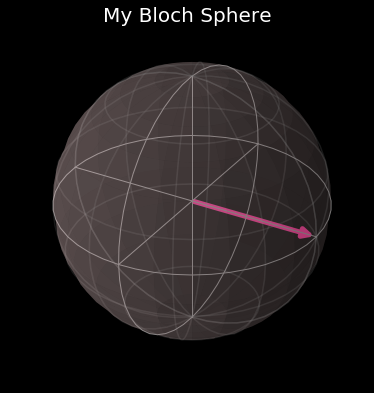

In [59]:
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([0,1,0], title='My Bloch Sphere')

In [112]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright